In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("demo.csv" ,names=["user name","amount" , "id", "date"])

In [10]:
df.head(1)

,user name,amount,id,date
0,Sylvester Sykes,9014.58,1009014458,2018-10-24


### Sobre escribir una columna


In [44]:
df["user name"] = "Carlos"

df.tail()

,user name,amount,id,date,name
94,Carlos,21281.47,1021281747,2018-11-29,Carlos
95,Carlos,72924.95,8000022770,2018-07-23,Carlos
96,Carlos,73541.17,1007354117,2018-08-05,Carlos
97,Carlos,72015.79,1007201579,2019-08-26,Carlos
98,Carlos,25694.88,8000061942,2019-12-08,Carlos


### Obtener un subset de la tablas

Subet a traves de slicing

In [22]:
df.loc[ :0 , ["amount"]]

,amount
0,9014.58


Subset con mascara booleana

In [42]:
boolean_mask = df.amount > 90000

columns = ["amount"]

df.loc[  boolean_mask ,columns]   ### tambien se puede sin las columnas df[boolean_mask]

,amount
18,92112.64
24,92331.14
52,92484.59
74,97798.93
77,98432.19
84,98107.66
85,91474.28


Subset con mascara de funcion

In [39]:
funcion_mask = lambda df : df["amount"] > 90000

df.loc[  funcion_mask ]

,user name,amount,id,date
18,Harlan Morse,92112.64,1009211264,2018-10-24
24,Cyrus Reid,92331.14,1009233114,2018-10-24
52,Quentin Cannon,92484.59,1009248459,2018-09-23
74,Ali Rosa,97798.93,1009779893,2019-01-31
77,Jonah Wolf,98432.19,1009843219,2018-05-22
84,Charles Heath,98107.66,1009810766,2018-05-22
85,Dustin Cooley,91474.28,8000057419,2018-05-22


Manejo de fechas

In [63]:
from datetime import datetime

d_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %I-%p')
df = pd.read_csv('ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser)

df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [64]:
df['DayOfWeek'] = df['Date'].dt.day_name()

df.head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [65]:
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filt]

df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [66]:
df.set_index('Date', inplace=True)

df.loc['2019']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [68]:
sample=df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

<AxesSubplot:xlabel='Date'>

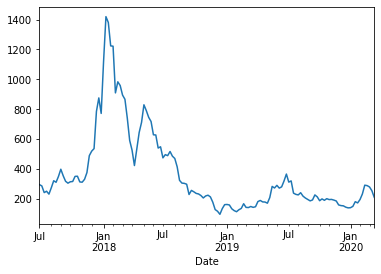

In [69]:
sample.High.plot()

https://www.youtube.com/watch?v=txMdrV1Ut64&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS&index=8
